In [21]:
import gzip
import numpy as np
from keras.utils import to_categorical

def open_images(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype=np.uint8, offset=16)\
            .reshape(-1, 28, 28)\
            .astype(np.float32)


def open_labels(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype=np.uint8, offset=8)
    
Y_train = open_images("../data/mnist/train-images-idx3-ubyte.gz")
Y_test = open_images("../data/mnist/t10k-images-idx3-ubyte.gz")

Y_train = Y_train / 255.
Y_test = Y_test / 255.

In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D

encoder = Sequential()
encoder.add(Conv2D(1, kernel_size=(3, 3), padding="same", activation="relu", input_shape=(28, 28, 1)))
encoder.add(MaxPooling2D(pool_size=(2, 2)))
encoder.add(Conv2D(2, kernel_size=(3, 3), padding="same", activation="relu"))
encoder.add(MaxPooling2D(pool_size=(2, 2)))

decoder = Sequential()
decoder.add(Conv2D(2, kernel_size=(3, 3), padding="same", activation="relu", input_shape=(7, 7, 2)))
decoder.add(UpSampling2D(size=(2, 2)))
decoder.add(Conv2D(4, kernel_size=(3, 3), padding="same", activation="relu"))
decoder.add(UpSampling2D(size=(2, 2)))
decoder.add(Conv2D(1, kernel_size=(3, 3), padding="same", activation="sigmoid"))

model = Sequential()
model.add(encoder)
model.add(decoder)

model.compile(optimizer="rmsprop", loss="mse")

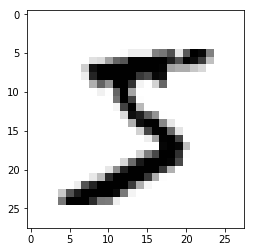

In [22]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.imshow(Y_train[0], cmap="gray_r")
plt.show()

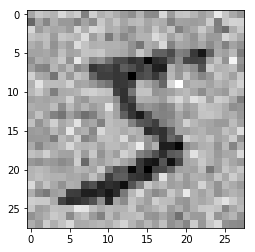

In [23]:
plt.imshow(Y_train[0] + np.random.normal(0, 0.2, (28, 28)), cmap="gray_r")

In [24]:
Y_train.shape

(60000, 28, 28)

In [36]:
X_train = Y_train + np.random.normal(0, 0.2, (60000, 28, 28))

X_test = Y_test + np.random.normal(0, 0.2, (10000, 28, 28))

In [37]:
model.fit(X_train.reshape(-1, 28, 28, 1), Y_train.reshape(-1, 28, 28, 1), epochs=10, batch_size=32)

Epoch 1/10
60000/60000 [==============================] - 10s 158us/step - loss: 0.0167
Epoch 2/10
60000/60000 [==============================] - 10s 159us/step - loss: 0.0160
Epoch 3/10
60000/60000 [==============================] - 10s 164us/step - loss: 0.0158
Epoch 4/10
60000/60000 [==============================] - 9s 158us/step - loss: 0.0156
Epoch 5/10
60000/60000 [==============================] - 9s 158us/step - loss: 0.0156
Epoch 6/10
60000/60000 [==============================] - 9s 158us/step - loss: 0.0155
Epoch 7/10
60000/60000 [==============================] - 10s 159us/step - loss: 0.0155
Epoch 8/10
60000/60000 [==============================] - 10s 158us/step - loss: 0.0154
Epoch 9/10
60000/60000 [==============================] - 9s 158us/step - loss: 0.0154
Epoch 10/10
60000/60000 [==============================] - 9s 158us/step - loss: 0.0154


In [38]:
Y_test_pred = model.predict(X_test.reshape(-1, 28, 28, 1))

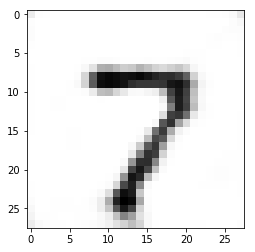

In [39]:
plt.imshow(Y_test_pred[0].reshape(28, 28), cmap="gray_r")
plt.show()

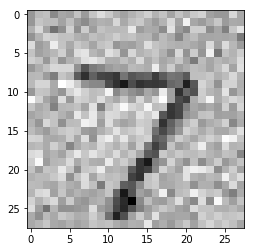

In [40]:
plt.imshow(X_test[0].reshape(28, 28), cmap="gray_r")
plt.show()